In [27]:
import os
import copy
import pickle
import torch
import nibabel as nib
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats

In [28]:
folder = 'k10b'
regions = 'ia'
val = 'val_'

In [29]:
aal_img = nib.load('./AAL/AAL.nii').get_fdata()[5:85, 8:103, 3:80]

file = open("./AAL/labels.pkl", "rb")
aal_labels = pickle.load(file)
file.close()

In [4]:
combined_activation_map = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_CN = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_MCI = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_AD = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))

combined_activation_map_wrong = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_wrong_CN = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_wrong_MCI = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
combined_activation_map_wrong_AD = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))

overlap_activation_map = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_CN = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_MCI = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_AD = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))

overlap_activation_map_wrong = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_wrong_CN = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_wrong_MCI = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))
overlap_activation_map_wrong_AD = np.zeros((aal_img.shape[0], aal_img.shape[1], aal_img.shape[2]))

In [5]:
count_combined_activation_map = 0
count_combined_activation_map_CN = 0
count_combined_activation_map_MCI = 0
count_combined_activation_map_AD = 0

count_combined_activation_map_wrong = 0
count_combined_activation_map_wrong_CN = 0
count_combined_activation_map_wrong_MCI = 0
count_combined_activation_map_wrong_AD = 0

count_overlap_activation_map = 0
count_overlap_activation_map_CN = 0
count_overlap_activation_map_MCI = 0
count_overlap_activation_map_AD = 0

count_overlap_activation_map_wrong = 0
count_overlap_activation_map_wrong_CN = 0
count_overlap_activation_map_wrong_MCI = 0
count_overlap_activation_map_wrong_AD = 0

for i in range(1, 11):
    temp_combined_activation_map = np.load(folder + '/ensamble/Map_' + val + 'All_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_CN = np.load(folder + '/ensamble/Map_' + val + 'CN_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_MCI = np.load(folder + '/ensamble/Map_' + val + 'MCI_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_AD = np.load(folder + '/ensamble/Map_' + val + 'AD_' + regions + '_' + str(i) + '.npy')

    temp_combined_activation_map_wrong = np.load(folder + '/ensamble/Map_' + val + 'wrong_All_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_wrong_CN = np.load(folder + '/ensamble/Map_' + val + 'wrong_CN_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_wrong_MCI = np.load(folder + '/ensamble/Map_' + val + 'wrong_MCI_' + regions + '_' + str(i) + '.npy')
    temp_combined_activation_map_wrong_AD = np.load(folder + '/ensamble/Map_' + val + 'wrong_AD_' + regions + '_' + str(i) + '.npy')

    temp_overlap_activation_map = np.load(folder + '/ensamble/Map_' + val + 'All_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_CN = np.load(folder + '/ensamble/Map_' + val + 'CN_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_MCI = np.load(folder + '/ensamble/Map_' + val + 'MCI_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_AD = np.load(folder + '/ensamble/Map_' + val + 'AD_overlap_' + regions + '_' + str(i) + '.npy')

    temp_overlap_activation_map_wrong = np.load(folder + '/ensamble/Map_' + val + 'wrong_All_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_wrong_CN = np.load(folder + '/ensamble/Map_' + val + 'wrong_CN_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_wrong_MCI = np.load(folder + '/ensamble/Map_' + val + 'wrong_MCI_overlap_' + regions + '_' + str(i) + '.npy')
    temp_overlap_activation_map_wrong_AD = np.load(folder + '/ensamble/Map_' + val + 'wrong_AD_overlap_' + regions + '_' + str(i) + '.npy')

    if temp_combined_activation_map.sum() > 0:
        count_combined_activation_map += 1
    if temp_combined_activation_map_CN.sum() > 0:
        count_combined_activation_map_CN += 1
    if temp_combined_activation_map_MCI.sum() > 0:
        count_combined_activation_map_MCI += 1
    if temp_combined_activation_map_AD.sum() > 0:
        count_combined_activation_map_AD += 1

    if temp_combined_activation_map_wrong.sum() > 0:
        count_combined_activation_map_wrong += 1
    if temp_combined_activation_map_wrong_CN.sum() > 0:
        count_combined_activation_map_wrong_CN += 1
    if temp_combined_activation_map_wrong_MCI.sum() > 0:
        count_combined_activation_map_wrong_MCI += 1
    if temp_combined_activation_map_wrong_AD.sum() > 0:
        count_combined_activation_map_wrong_AD += 1

    if temp_overlap_activation_map.sum() > 0:
        count_overlap_activation_map += 1
    if temp_overlap_activation_map_CN.sum() > 0:
        count_overlap_activation_map_CN += 1
    if temp_overlap_activation_map_MCI.sum() > 0:
        count_overlap_activation_map_MCI += 1
    if temp_overlap_activation_map_AD.sum() > 0:
        count_overlap_activation_map_AD += 1

    if temp_overlap_activation_map_wrong.sum() > 0:
        count_overlap_activation_map_wrong += 1
    if temp_overlap_activation_map_wrong_CN.sum() > 0:
        count_overlap_activation_map_wrong_CN += 1
    if temp_overlap_activation_map_wrong_MCI.sum() > 0:
        count_overlap_activation_map_wrong_MCI += 1
    if temp_overlap_activation_map_wrong_AD.sum() > 0:
        count_overlap_activation_map_wrong_AD += 1

    combined_activation_map += temp_combined_activation_map
    combined_activation_map_CN += temp_combined_activation_map_CN
    combined_activation_map_MCI += temp_combined_activation_map_MCI
    combined_activation_map_AD += temp_combined_activation_map_AD

    combined_activation_map_wrong += temp_combined_activation_map_wrong
    combined_activation_map_wrong_CN += temp_combined_activation_map_wrong_CN
    combined_activation_map_wrong_MCI += temp_combined_activation_map_wrong_MCI
    combined_activation_map_wrong_AD += temp_combined_activation_map_wrong_AD

    overlap_activation_map += temp_overlap_activation_map
    overlap_activation_map_CN += temp_overlap_activation_map_CN
    overlap_activation_map_MCI += temp_overlap_activation_map_MCI
    overlap_activation_map_AD += temp_overlap_activation_map_AD

    overlap_activation_map_wrong += temp_overlap_activation_map_wrong
    overlap_activation_map_wrong_CN += temp_overlap_activation_map_wrong_CN
    overlap_activation_map_wrong_MCI += temp_overlap_activation_map_wrong_MCI
    overlap_activation_map_wrong_AD += temp_overlap_activation_map_wrong_AD
    
combined_activation_map = combined_activation_map / count_combined_activation_map
combined_activation_map_CN = combined_activation_map_CN / count_combined_activation_map_CN
combined_activation_map_MCI = combined_activation_map_MCI / count_combined_activation_map_MCI
combined_activation_map_AD = combined_activation_map_AD / count_combined_activation_map_AD

combined_activation_map_wrong = combined_activation_map_wrong / count_combined_activation_map_wrong
combined_activation_map_wrong_CN = combined_activation_map_wrong_CN / count_combined_activation_map_wrong_CN
combined_activation_map_wrong_MCI = combined_activation_map_wrong_MCI / count_combined_activation_map_wrong_MCI
combined_activation_map_wrong_AD = combined_activation_map_wrong_AD / count_combined_activation_map_wrong_AD

overlap_activation_map = overlap_activation_map / count_overlap_activation_map
overlap_activation_map_CN = overlap_activation_map_CN / count_overlap_activation_map_CN
overlap_activation_map_MCI = overlap_activation_map_MCI / count_overlap_activation_map_MCI
overlap_activation_map_AD = overlap_activation_map_AD / count_overlap_activation_map_AD

overlap_activation_map_wrong = overlap_activation_map_wrong / count_overlap_activation_map_wrong
overlap_activation_map_wrong_CN = overlap_activation_map_wrong_CN / count_overlap_activation_map_wrong_CN
overlap_activation_map_wrong_MCI = overlap_activation_map_wrong_MCI / count_overlap_activation_map_wrong_MCI
overlap_activation_map_wrong_AD = overlap_activation_map_wrong_AD / count_overlap_activation_map_wrong_AD

In [6]:
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'All.npy', combined_activation_map)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'CN.npy', combined_activation_map_CN)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'MCI.npy', combined_activation_map_MCI)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'AD.npy', combined_activation_map_AD)

np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_All.npy', combined_activation_map_wrong)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_CN.npy', combined_activation_map_wrong_CN)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_MCI.npy', combined_activation_map_wrong_MCI)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_AD.npy', combined_activation_map_wrong_AD)

np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'All_overlap.npy', overlap_activation_map)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'CN_overlap.npy', overlap_activation_map_CN)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'MCI_overlap.npy', overlap_activation_map_MCI)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'AD_overlap.npy', overlap_activation_map_AD)

np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_All_overlap.npy', overlap_activation_map_wrong)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_CN_overlap.npy', overlap_activation_map_wrong_CN)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_MCI_overlap.npy', overlap_activation_map_wrong_MCI)
np.save(folder + '/ensamble/average_' + regions + '_Map_' + val + 'wrong_AD_overlap.npy', overlap_activation_map_wrong_AD)

In [7]:
vmax = max(combined_activation_map_CN.max(), combined_activation_map_MCI.max(), combined_activation_map_AD.max())

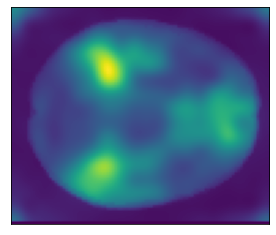

In [8]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_CN[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('CN_GACAM.png')

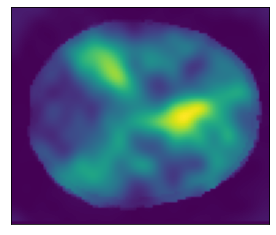

In [9]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_MCI[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('MCI_GACAM.png')

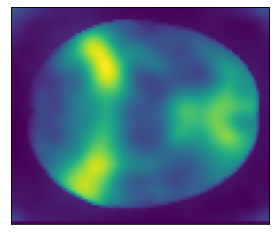

In [10]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_AD[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('AD_GACAM.png')

In [11]:
vmax = max(combined_activation_map_wrong_CN.max(), combined_activation_map_wrong_MCI.max(), combined_activation_map_wrong_AD.max())

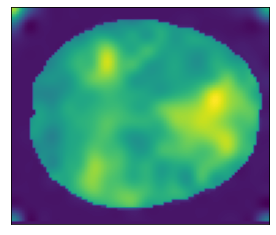

In [12]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_wrong_CN[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('CN_incorrect_GACAM.png')

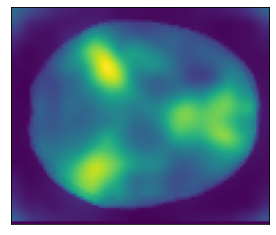

In [13]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_wrong_MCI[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('MCI_incorrect_GACAM.png')

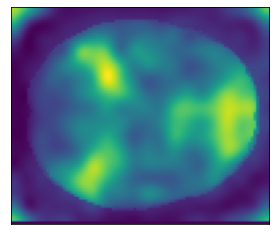

In [14]:
fig, ax = plt.subplots()
ax.imshow(combined_activation_map_wrong_AD[:, :, 45])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('AD_incorrect_GACAM.png')

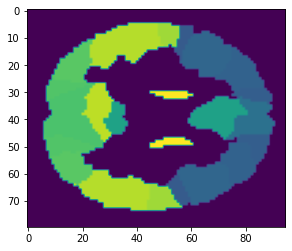

In [15]:
plt.imshow(aal_img[:, :, 45])

In [24]:
all_stats = {}

for stats, CAM in zip(['All', 'CN', 'MCI', 'AD', 'CN-All', 'MCI-All', 'AD-All'],
                      [combined_activation_map,
                       combined_activation_map_CN,
                       combined_activation_map_MCI,
                       combined_activation_map_AD,
                       combined_activation_map_CN - combined_activation_map,
                       combined_activation_map_MCI - combined_activation_map,
                       combined_activation_map_AD - combined_activation_map]):

    volumes = {}
    intensities = {}
    densities = {}

    for key in aal_labels.keys():
        mask = aal_img != aal_labels[key]
        masked_cam = copy.copy(CAM)
        masked_cam[mask] = 0

        volumes[key] = mask.size - np.count_nonzero(mask)
        intensities[key] = masked_cam.sum()
        densities[key] = intensities[key] / volumes[key]

    all_stats[stats] = {}
    all_stats[stats]['Volume'] = dict(sorted(volumes.items(), key = lambda item: item[1], reverse = False))
    all_stats[stats]['Intensities'] = dict(sorted(intensities.items(), key = lambda item: item[1], reverse = False))
    all_stats[stats]['Densities'] = dict(sorted(densities.items(), key = lambda item: item[1], reverse = False))

for stats, CAM in zip(['All', 'CN', 'MCI', 'AD', 'CN-All', 'MCI-All', 'AD-All'],
                      [overlap_activation_map,
                       overlap_activation_map_CN,
                       overlap_activation_map_MCI,
                       overlap_activation_map_AD,
                       overlap_activation_map_CN - overlap_activation_map,
                       overlap_activation_map_MCI - overlap_activation_map,
                       overlap_activation_map_AD - overlap_activation_map]):

    overlap = {}

    for key in aal_labels.keys():
        mask = aal_img != aal_labels[key]
        masked_cam = copy.copy(CAM)
        masked_cam[mask] = 0

        overlap[key] = masked_cam.sum() / (mask.size - np.count_nonzero(mask))

    all_stats[stats]['Overlap'] = dict(sorted(overlap.items(), key = lambda item: item[1], reverse = False))

with open('stats.npy', 'wb') as fp:
    pickle.dump(all_stats, fp)

In [30]:
with open(folder + '/stats.npy', 'rb') as fp:
    all_stats = pickle.load(fp)

In [31]:
def side(code):
    if code % 10 == 0:
        return 'Misc'
    elif code % 10 == 1:
        return 'Left'
    else:
        return 'Right'
    
def lobe(code):
    if code >= 2000 and code < 3000 or code >= 6400 and code < 6500:  # Frontal Lobe, https://www.pmod.com/files/download/v35/doc/pneuro/6750.htm
        return 'Frontal'
    elif code >= 4100 and code < 4300 or code >= 5400 and code < 5500 or code >= 8000 and code < 9000:    # Temporal Lobe
        return 'Temporal'
    elif code >= 6000 and code < 6400:   # Parietal Lobe
        return 'Parietal'
    elif code >= 5000 and code < 5400:   # Occipital Lobe
        return 'Occipital'
    elif code > 9000:
        return 'Cerebellum'
    elif code >= 4000 and code < 5000:
        return 'Cingulum'
    else:
        return 'Misc'

all_stats_df = pd.DataFrame(columns = ['Region',
                                       'All Intensity',
                                       'All Intensity Rank',
                                       'CN Intensity',
                                       'CN Intensity Rank',
                                       'MCI Intensity',
                                       'MCI Intensity Rank',
                                       'AD Intensity',
                                       'AD Intensity Rank',
                                       'CN-All Intensity',
                                       'CN-All Intensity Rank',
                                       'MCI-All Intensity',
                                       'MCI-All Intensity Rank',
                                       'AD-All Intensity',
                                       'AD-All Intensity Rank',
                                       'All Overlap',
                                       'All Overlap Rank',
                                       'CN Overlap',
                                       'CN Overlap Rank',
                                       'MCI Overlap',
                                       'MCI Overlap Rank',
                                       'AD Overlap',
                                       'AD Overlap Rank',
                                       'CN-All Overlap',
                                       'CN-All Overlap Rank',
                                       'MCI-All Overlap',
                                       'MCI-All Overlap Rank',
                                       'AD-All Overlap',
                                       'AD-All Overlap Rank'])

all_keys = list(all_stats['All']['Intensities'].keys())
cn_keys = list(all_stats['CN']['Intensities'].keys())
mci_keys = list(all_stats['MCI']['Intensities'].keys())
ad_keys = list(all_stats['AD']['Intensities'].keys())
cn_all_keys = list(all_stats['CN-All']['Intensities'].keys())
mci_all_keys = list(all_stats['MCI-All']['Intensities'].keys())
ad_all_keys = list(all_stats['AD-All']['Intensities'].keys())

overlap_all_keys = list(all_stats['All']['Overlap'].keys())
overlap_cn_keys = list(all_stats['CN']['Overlap'].keys())
overlap_mci_keys = list(all_stats['MCI']['Overlap'].keys())
overlap_ad_keys = list(all_stats['AD']['Overlap'].keys())
overlap_cn_all_keys = list(all_stats['CN-All']['Overlap'].keys())
overlap_mci_all_keys = list(all_stats['MCI-All']['Overlap'].keys())
overlap_ad_all_keys = list(all_stats['AD-All']['Overlap'].keys())

for key in aal_labels.keys():
    all_stats_df = all_stats_df.append({
        'Region': key,
        'Code': aal_labels[key],
        'Side': side(aal_labels[key]),
        'Lobe': lobe(aal_labels[key]),
        'All Intensity': all_stats['All']['Intensities'][key],
        'All Intensity Rank': 117 - all_keys.index(key),
        'CN Intensity': all_stats['CN']['Intensities'][key],
        'CN Intensity Rank': 117 - cn_keys.index(key),
        'MCI Intensity': all_stats['MCI']['Intensities'][key],
        'MCI Intensity Rank': 117 - mci_keys.index(key),
        'AD Intensity': all_stats['AD']['Intensities'][key],
        'AD Intensity Rank': 117 - ad_keys.index(key),
        'CN-All Intensity': all_stats['CN-All']['Intensities'][key],
        'CN-All Intensity Rank': 117 - cn_all_keys.index(key),
        'MCI-All Intensity': all_stats['MCI-All']['Intensities'][key],
        'MCI-All Intensity Rank': 117 - mci_all_keys.index(key),
        'AD-All Intensity': all_stats['AD-All']['Intensities'][key],
        'AD-All Intensity Rank': 116 - ad_all_keys.index(key),
        'All Overlap': all_stats['All']['Overlap'][key],
        'All Overlap Rank': 117 - overlap_all_keys.index(key),
        'CN Overlap': all_stats['CN']['Overlap'][key],
        'CN Overlap Rank': 117 - overlap_cn_keys.index(key),
        'MCI Overlap': all_stats['MCI']['Overlap'][key],
        'MCI Overlap Rank': 117 - overlap_mci_keys.index(key),
        'AD Overlap': all_stats['AD']['Overlap'][key],
        'AD Overlap Rank': 117 - overlap_ad_keys.index(key),
        'CN-All Overlap': all_stats['CN-All']['Overlap'][key],
        'CN-All Overlap Rank': 117 - overlap_cn_all_keys.index(key),
        'MCI-All Overlap': all_stats['MCI-All']['Overlap'][key],
        'MCI-All Overlap Rank': 117 - overlap_mci_all_keys.index(key),
        'AD-All Overlap': all_stats['AD-All']['Overlap'][key],
        'AD-All Overlap Rank': 117 - overlap_ad_all_keys.index(key)
    }, ignore_index = True)

In [19]:
all_stats_df_regions = all_stats_df[all_stats_df['Region'] != 'Background']

In [20]:
def calculateColor(lobes):
    colors = []
    
    for lobe in lobes:
        if lobe == 'Frontal':
            colors.append('#CC3333')
        elif lobe == 'Temporal':
            colors.append('#33CC33')
        elif lobe == 'Parietal':
            colors.append('#3333CC')
        elif lobe == 'Occipital':
            colors.append('#CCCC33')
        elif lobe == 'Cerebellum':
            colors.append('#CC33CC')
        elif lobe == 'Cingulum':
            colors.append('#33CCCC')
        else:
            colors.append('#333333')
            
    return colors

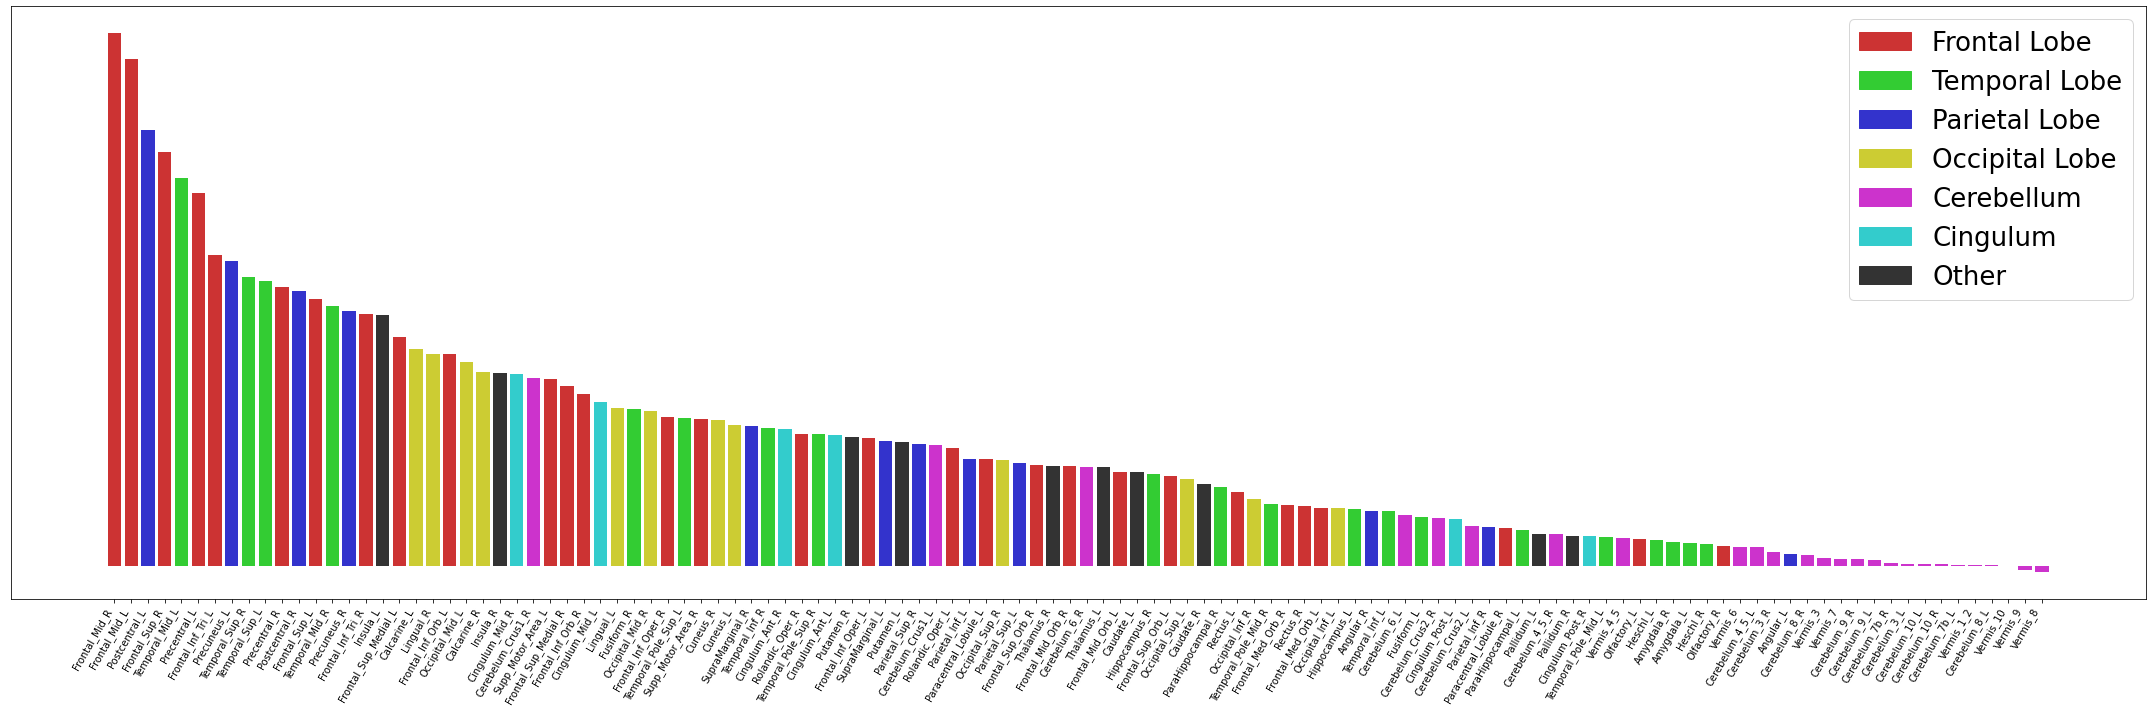

In [21]:
condition = 'CN-All'
fig, ax = plt.subplots(figsize = (30, 10))
ax.bar(np.arange(len(all_stats_df_regions.index)), list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')[condition + ' Intensity']), color = calculateColor(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Lobe'].values))
ax.set_xticks(np.arange(len(all_stats_df_regions.index)))
ax.set_xticklabels(list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Region']), rotation = 60, ha = 'right')
ax.set_yticks([])
frontal_legend = mpatches.Patch(color='#CC3333', label='Frontal Lobe')
temporal_legend = mpatches.Patch(color='#33CC33', label='Temporal Lobe')
parietal_legend = mpatches.Patch(color='#3333CC', label='Parietal Lobe')
occipital_legend = mpatches.Patch(color='#CCCC33', label='Occipital Lobe')
cerebellum_legend = mpatches.Patch(color='#CC33CC', label='Cerebellum')
cingulum_legend = mpatches.Patch(color='#33CCCC', label='Cingulum')
misc_legend = mpatches.Patch(color='#333333', label='Other')
ax.legend(loc='upper right', handles=[frontal_legend, temporal_legend, parietal_legend, occipital_legend, cerebellum_legend, cingulum_legend, misc_legend], fontsize=26)
fig.tight_layout()
fig.savefig('CN_Bars_wrong.png')
pass

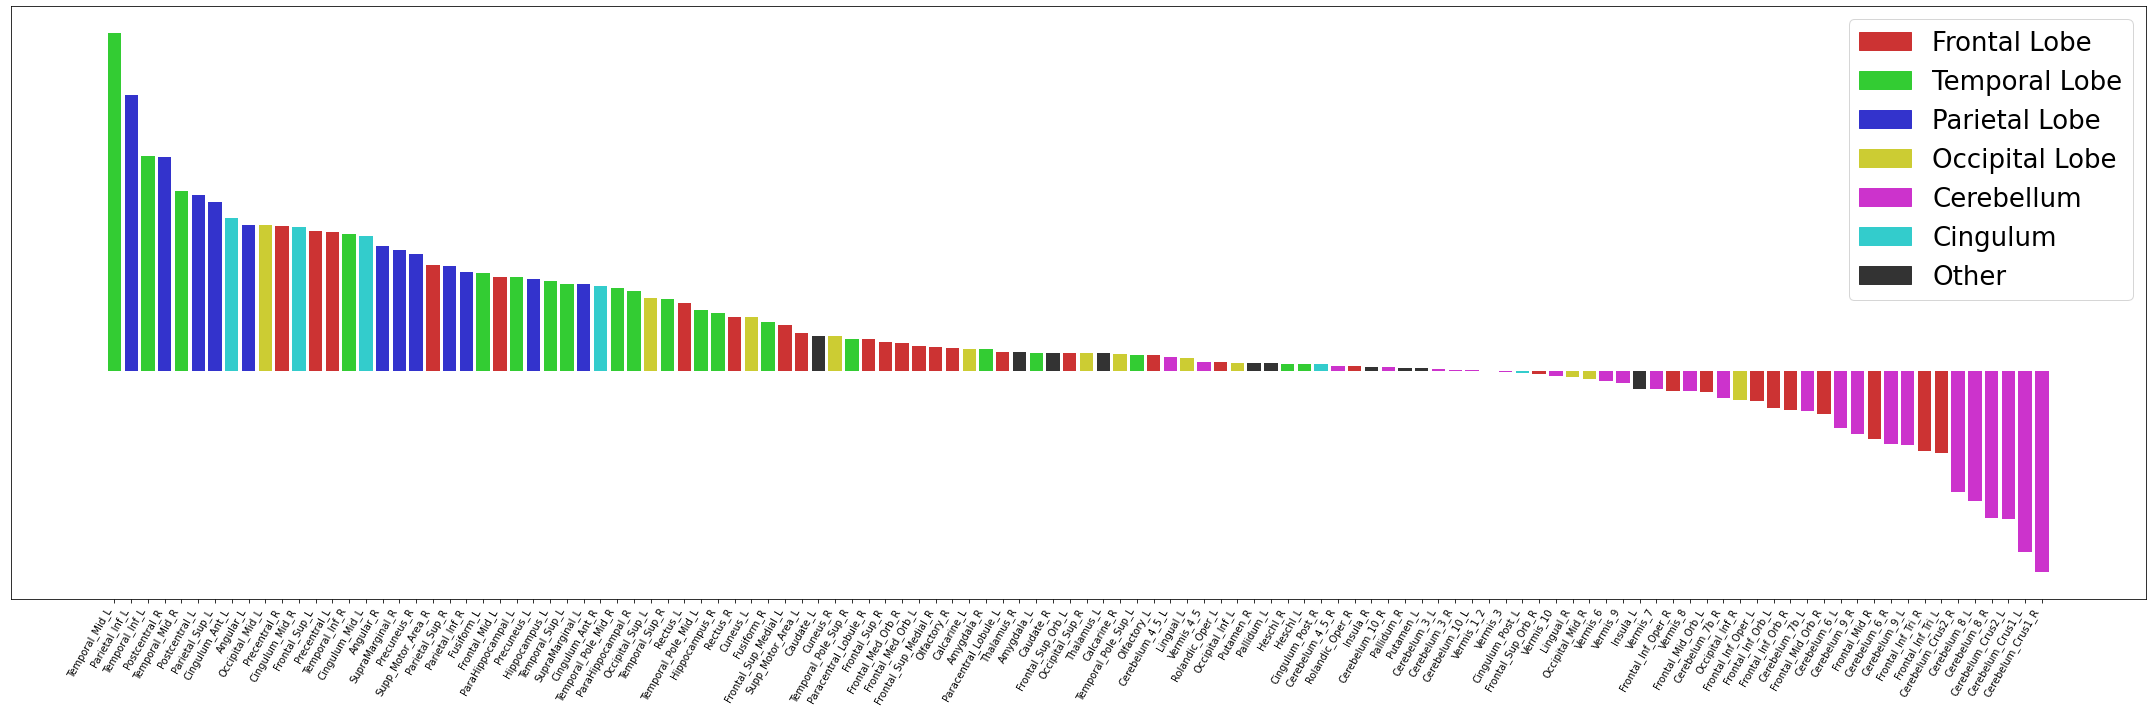

In [22]:
condition = 'MCI-All'
fig, ax = plt.subplots(figsize = (30, 10))
ax.bar(np.arange(len(all_stats_df_regions.index)), list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')[condition + ' Intensity']), color = calculateColor(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Lobe'].values))
ax.set_xticks(np.arange(len(all_stats_df_regions.index)))
ax.set_xticklabels(list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Region']), rotation = 60, ha = 'right')
ax.set_yticks([])
frontal_legend = mpatches.Patch(color='#CC3333', label='Frontal Lobe')
temporal_legend = mpatches.Patch(color='#33CC33', label='Temporal Lobe')
parietal_legend = mpatches.Patch(color='#3333CC', label='Parietal Lobe')
occipital_legend = mpatches.Patch(color='#CCCC33', label='Occipital Lobe')
cerebellum_legend = mpatches.Patch(color='#CC33CC', label='Cerebellum')
cingulum_legend = mpatches.Patch(color='#33CCCC', label='Cingulum')
misc_legend = mpatches.Patch(color='#333333', label='Other')
ax.legend(loc='upper right', handles=[frontal_legend, temporal_legend, parietal_legend, occipital_legend, cerebellum_legend, cingulum_legend, misc_legend], fontsize=26)
fig.tight_layout()
fig.savefig('MCI_Bars_wrong.png')
pass

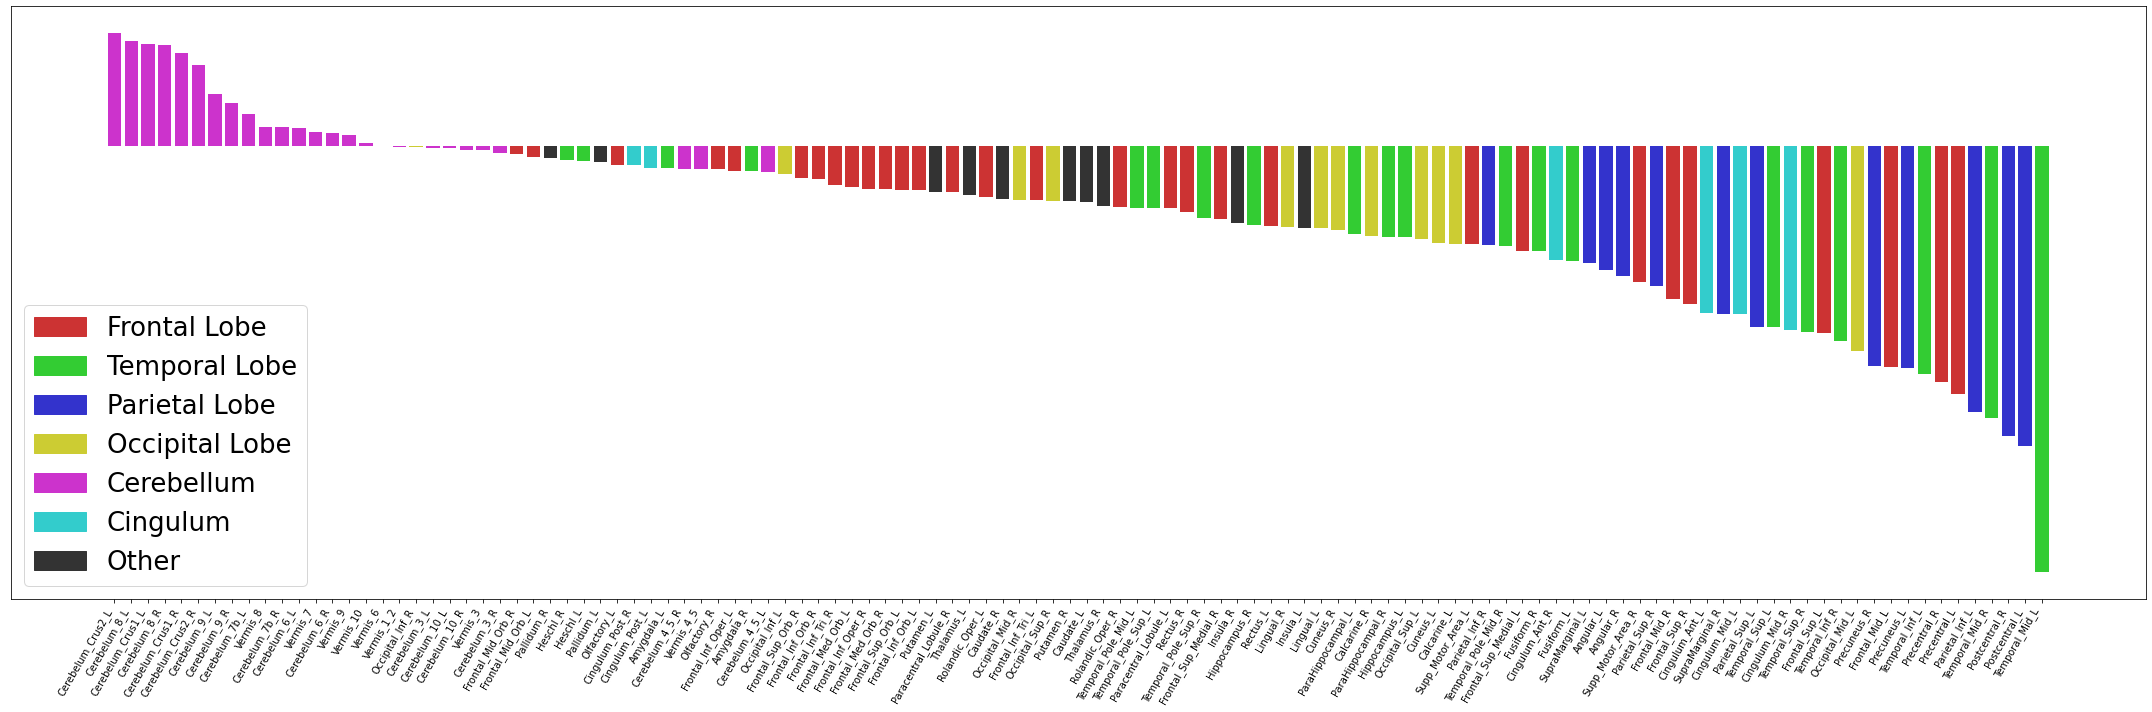

In [23]:
condition = 'AD-All'
fig, ax = plt.subplots(figsize = (30, 10))
ax.bar(np.arange(len(all_stats_df_regions.index)), list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')[condition + ' Intensity']), color = calculateColor(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Lobe'].values))
ax.set_xticks(np.arange(len(all_stats_df_regions.index)))
ax.set_xticklabels(list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Region']), rotation = 60, ha = 'right')
ax.set_yticks([])
frontal_legend = mpatches.Patch(color='#CC3333', label='Frontal Lobe')
temporal_legend = mpatches.Patch(color='#33CC33', label='Temporal Lobe')
parietal_legend = mpatches.Patch(color='#3333CC', label='Parietal Lobe')
occipital_legend = mpatches.Patch(color='#CCCC33', label='Occipital Lobe')
cerebellum_legend = mpatches.Patch(color='#CC33CC', label='Cerebellum')
cingulum_legend = mpatches.Patch(color='#33CCCC', label='Cingulum')
misc_legend = mpatches.Patch(color='#333333', label='Other')
ax.legend(loc='lower left', handles=[frontal_legend, temporal_legend, parietal_legend, occipital_legend, cerebellum_legend, cingulum_legend, misc_legend], fontsize=26)
fig.tight_layout()
fig.savefig('AD_Bars_wrong.png')
pass

In [26]:
all_stats_df_regions[all_stats_df_regions['Side'] == 'Right']['Region'].values

array(['Precentral_R', 'Frontal_Sup_R', 'Frontal_Sup_Orb_R',
       'Frontal_Mid_R', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_R',
       'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_R',
       'Supp_Motor_Area_R', 'Olfactory_R', 'Frontal_Sup_Medial_R',
       'Frontal_Med_Orb_R', 'Rectus_R', 'Insula_R', 'Cingulum_Ant_R',
       'Cingulum_Mid_R', 'Cingulum_Post_R', 'Hippocampus_R',
       'ParaHippocampal_R', 'Amygdala_R', 'Calcarine_R', 'Cuneus_R',
       'Lingual_R', 'Occipital_Sup_R', 'Occipital_Mid_R',
       'Occipital_Inf_R', 'Fusiform_R', 'Postcentral_R', 'Parietal_Sup_R',
       'Parietal_Inf_R', 'SupraMarginal_R', 'Angular_R', 'Precuneus_R',
       'Paracentral_Lobule_R', 'Caudate_R', 'Putamen_R', 'Pallidum_R',
       'Thalamus_R', 'Heschl_R', 'Temporal_Sup_R', 'Temporal_Pole_Sup_R',
       'Temporal_Mid_R', 'Temporal_Pole_Mid_R', 'Temporal_Inf_R',
       'Cerebelum_Crus1_R', 'Cerebelum_Crus2_R', 'Cerebelum_3_R',
       'Cerebelum_4_5_R', 'Cerebelum_6_R', 'Cerebelum_7

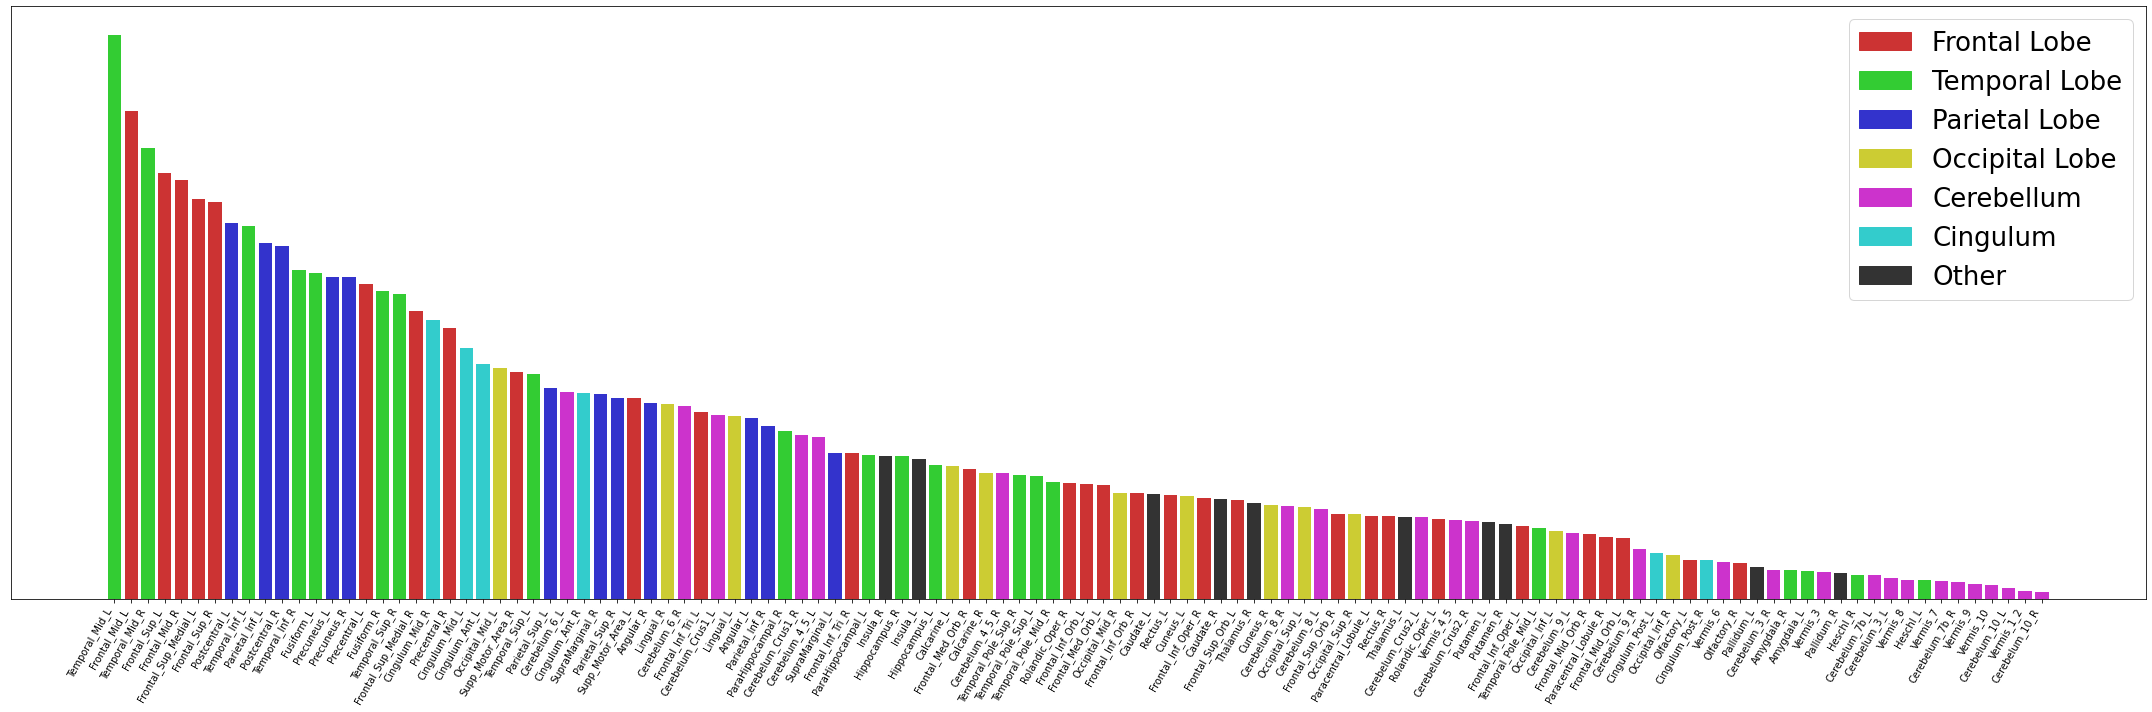

In [36]:
condition = 'All'
fig, ax = plt.subplots(figsize = (30, 10))
ax.bar(np.arange(len(all_stats_df_regions.index)), list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')[condition + ' Intensity']), color = calculateColor(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Lobe'].values))
ax.set_xticks(np.arange(len(all_stats_df_regions.index)))
ax.set_xticklabels(list(all_stats_df_regions.sort_values(condition + ' Intensity Rank')['Region']), rotation = 60, ha = 'right')
ax.set_yticks([])
frontal_legend = mpatches.Patch(color='#CC3333', label='Frontal Lobe')
temporal_legend = mpatches.Patch(color='#33CC33', label='Temporal Lobe')
parietal_legend = mpatches.Patch(color='#3333CC', label='Parietal Lobe')
occipital_legend = mpatches.Patch(color='#CCCC33', label='Occipital Lobe')
cerebellum_legend = mpatches.Patch(color='#CC33CC', label='Cerebellum')
cingulum_legend = mpatches.Patch(color='#33CCCC', label='Cingulum')
misc_legend = mpatches.Patch(color='#333333', label='Other')
ax.legend(loc='upper right', handles=[frontal_legend, temporal_legend, parietal_legend, occipital_legend, cerebellum_legend, cingulum_legend, misc_legend], fontsize=26)
fig.tight_layout()
fig.savefig('All_Bars.png')
pass